In [1]:
import numpy as np
import math
import torch
from DataLoader import MabulaDataset
from torch.utils.data import DataLoader
from albumentations.pytorch import ToTensor
from albumentations import RandomCrop
from Utility import scale, calculate_scores
import skimage
from skimage.metrics import structural_similarity
from matplotlib import pyplot as plt
import skimage
from GANblocks import transformationMatrix
from EvaleModel import linear_upsampling
import cv2

In [2]:
transforms=[ToTensor()]
train_data = MabulaDataset(file_path="/Data/OCTA_New/Train", transforms=transforms)
test_data = MabulaDataset(file_path="/Data/OCTA_New/Test", transforms=transforms)
batch_size= 1
test_loader = DataLoader(dataset=test_data, batch_size=1, shuffle=True, num_workers=0)

In [3]:
scale_factors = [2, 4, 8]
for scale_factor in scale_factors:
    PSNR = 0
    count = 0
    SSIM = 0
    for batch in test_loader:
        t = transformationMatrix(320, stride=scale_factor, batch_size=batch_size, torch_=False, GRID=False)
        t=torch.tensor(t).float()
        #batch['image'] = scale(batch['image'])
        downsampled_im = torch.matmul(t, batch['image'])
        downsampled_im_copy = torch.tensor(downsampled_im)
        upsampled_im = linear_upsampling(downsampled_im)
        PSNR_1, SSIM_1 = calculate_scores(upsampled_im, batch['image'])
        SSIM += SSIM_1
        PSNR += PSNR_1
        count += 1
    print("PSNR for stride " + str(scale_factor) + " was: " + str(PSNR/count))
    print("SSIM for stride " + str(scale_factor) + " was: " + str(SSIM/count))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


PSNR for stride 2 was: 23.04699013149269
SSIM for stride 2 was: 0.7991513633305464
PSNR for stride 4 was: 18.541676221812796
SSIM for stride 4 was: 0.5248949083251002
PSNR for stride 8 was: 15.542507878470104
SSIM for stride 8 was: 0.3009262627895129


(array([14976., 23327., 21541., 15140.,  9898.,  5800.,  3989.,  2933.,
         2699.,  2097.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

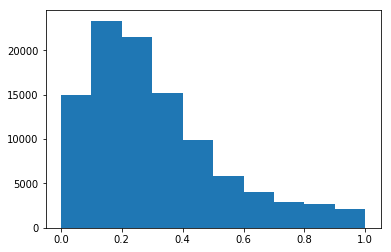

In [4]:
image = iter(test_loader).next()
plt.hist(image['image'].numpy().flatten())

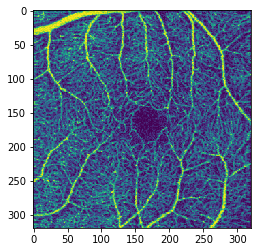

torch.Size([1, 320, 320])
torch.Size([1, 320, 320])


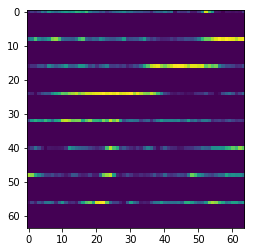

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


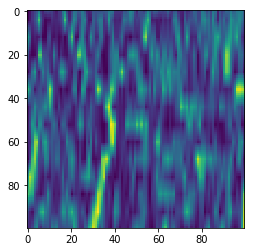

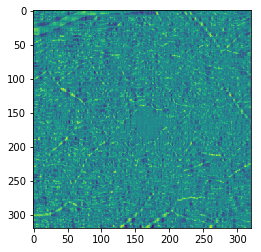

True

In [6]:
im_1 = torch.tensor(cv2.imread("Data/OCTA_New/Visualizing_Article/opttest.jpg")).unsqueeze(0)[:,:,:,0]
plt.imshow(im_1[0])
plt.show()
cv2.imwrite("Figures/true_im_linear.png", im_1[0].numpy())
t = transformationMatrix(320, stride=scale_factor, batch_size=1, torch_=False, GRID=False)
t=torch.tensor(t).float()
print(t.shape)
print(im_1.shape)
#batch['image'] = scale(batch['image'])
downsampled_im = torch.matmul(t, im_1.float())
plt.imshow(downsampled_im[0, 0:64,0:64])
plt.show()
cv2.imwrite("Figures/downsampled_image_zoom_linear.png", downsampled_im[0, 0:64,0:64].numpy())
downsampled_im_copy = torch.tensor(downsampled_im)
upsampled_im = linear_upsampling(downsampled_im.unsqueeze(0))
plt.imshow(upsampled_im[0,0, 180:280, 180:280])
plt.show()
cv2.imwrite("Figures/upsampled_image_linear.png", upsampled_im[0,0, 180:280, 180:280].numpy())
plt.imshow(im_1[0]-upsampled_im[0,0])
plt.show()
cv2.imwrite("Figures/residuals_linear.png", (im_1[0]-upsampled_im[0,0]).numpy())